In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"D:\Google_Stock_Price_Train.csv")

In [3]:
dataset

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [4]:
dataset["Date"]= pd.to_datetime(dataset["Date"])

In [5]:
dataset

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"73,80,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"57,49,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"65,90,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"54,05,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"6,23,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"7,89,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"11,53,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"7,44,300"


In [6]:
dataset.set_index("Date",inplace=True)

In [7]:
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"73,80,500"
2012-01-04,331.27,333.87,329.08,666.45,"57,49,400"
2012-01-05,329.83,330.75,326.89,657.21,"65,90,300"
2012-01-06,328.34,328.77,323.68,648.24,"54,05,900"
2012-01-09,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"6,23,400"
2016-12-27,790.68,797.86,787.66,791.55,"7,89,100"
2016-12-28,793.70,794.23,783.20,785.05,"11,53,800"


#### Uni-variant splitting::

In [8]:
data=dataset["Open"]

In [9]:
data

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Open, Length: 1258, dtype: float64

#### Visualizing to check stationary::

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


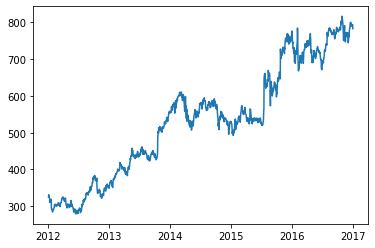

In [10]:
plt.plot(data)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
result = adfuller(data)

In [13]:
pcal =result[1]

In [14]:
pcal

0.8260100940100733

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

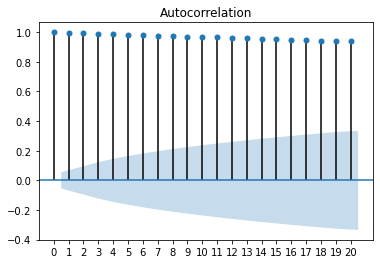

In [16]:
plot_acf(data,lags=20)
plt.xticks(range(0,21))
plt.show()

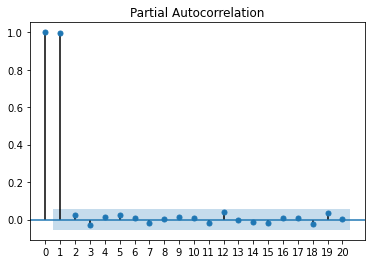

In [17]:
plot_pacf(data,lags=20)
plt.xticks(range(0,21))
plt.show()

### Splitting Train and Test::

In [18]:
length=data.shape[0]

In [19]:
threshold = int(data.shape[0]*10/100)

In [20]:
length-threshold

1133

In [21]:
train= data.iloc[0:1133]

In [22]:
train

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2016-06-28    678.97
2016-06-29    683.00
2016-06-30    685.47
2016-07-01    692.20
2016-07-05    696.06
Name: Open, Length: 1133, dtype: float64

In [23]:
test = data.iloc[length-threshold:]

In [24]:
threshold

125

## Model Building::

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [121]:
arima_model = ARIMA(train,order=(2,1,2))

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [122]:
arima_model=arima_model.fit()

In [123]:
start=len(train)
end = 1257

#### Value Prediction::

In [124]:
pred = arima_model.predict(start=start,end=end)
pred.index = dataset.index[start:end+1] # to get the index 

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [125]:
pred

Date
2016-07-06    1.466155
2016-07-07    0.190607
2016-07-08   -0.728022
2016-07-11    0.990954
2016-07-12    1.038863
                ...   
2016-12-23    0.603022
2016-12-27    0.709807
2016-12-28   -0.135138
2016-12-29    0.181798
2016-12-30    0.857833
Length: 125, dtype: float64

In [126]:
test

Date
2016-07-06    689.98
2016-07-07    698.08
2016-07-08    699.50
2016-07-11    708.05
2016-07-12    719.12
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Open, Length: 125, dtype: float64

In [127]:
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"73,80,500"
2012-01-04,331.27,333.87,329.08,666.45,"57,49,400"
2012-01-05,329.83,330.75,326.89,657.21,"65,90,300"
2012-01-06,328.34,328.77,323.68,648.24,"54,05,900"
2012-01-09,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"6,23,400"
2016-12-27,790.68,797.86,787.66,791.55,"7,89,100"
2016-12-28,793.70,794.23,783.20,785.05,"11,53,800"


In [128]:
len(train)-2

1131

In [138]:
datayt2 = dataset["Open"].iloc[len(train)-1:-1]

In [139]:
datayt2

Date
2016-07-05    696.06
2016-07-06    689.98
2016-07-07    698.08
2016-07-08    699.50
2016-07-11    708.05
               ...  
2016-12-22    792.36
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
Name: Open, Length: 125, dtype: float64

In [140]:
pred

Date
2016-07-06    1.466155
2016-07-07    0.190607
2016-07-08   -0.728022
2016-07-11    0.990954
2016-07-12    1.038863
                ...   
2016-12-23    0.603022
2016-12-27    0.709807
2016-12-28   -0.135138
2016-12-29    0.181798
2016-12-30    0.857833
Length: 125, dtype: float64

In [141]:
pred_final = pred.values+datayt2.values

In [142]:
pred_final

array([697.52615478, 690.17060734, 697.3519779 , 700.49095365,
       709.0888633 , 718.43723725, 723.75058297, 723.00427449,
       725.70427511, 722.13148633, 731.01986417, 738.15176442,
       739.64857837, 742.21931864, 742.00823052, 738.83138819,
       737.8778915 , 748.26229781, 773.31133644, 760.39748472,
       769.25756372, 768.39545421, 771.8671009 , 773.57127741,
       783.26812123, 781.48743914, 783.11915895, 785.74797886,
       782.56435249, 783.29445892, 780.29181876, 778.5892383 ,
       780.19882432, 774.46734568, 774.16504785, 776.37386084,
       770.06444313, 767.19020042, 770.22933702, 768.752848  ,
       768.92472522, 768.01516502, 769.96301079, 772.47609959,
       773.82797966, 781.15358015, 778.45526736, 769.84332072,
       756.20663226, 765.01052924, 759.09674265, 763.43788032,
       770.79825748, 772.17012407, 768.90489983, 773.76957343,
       780.35448462, 786.13221651, 783.43401146, 776.42041828,
       777.51971204, 781.51135389, 777.43577666, 774.44

In [134]:
a=pred.values

In [136]:
b=datayt2[:-1].values

In [137]:
datayt2

Date
2016-07-01    692.20
2016-07-05    696.06
2016-07-06    689.98
2016-07-07    698.08
2016-07-08    699.50
               ...  
2016-12-21    795.84
2016-12-22    792.36
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
Name: Open, Length: 125, dtype: float64

In [41]:
pred_final = a+b

ValueError: operands could not be broadcast together with shapes (125,) (123,) 

In [144]:
pred_final=pd.Series(pred_final,index=pred.index)

In [145]:
test

Date
2016-07-06    689.98
2016-07-07    698.08
2016-07-08    699.50
2016-07-11    708.05
2016-07-12    719.12
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Open, Length: 125, dtype: float64

### Plotting Actual vs Predictions::

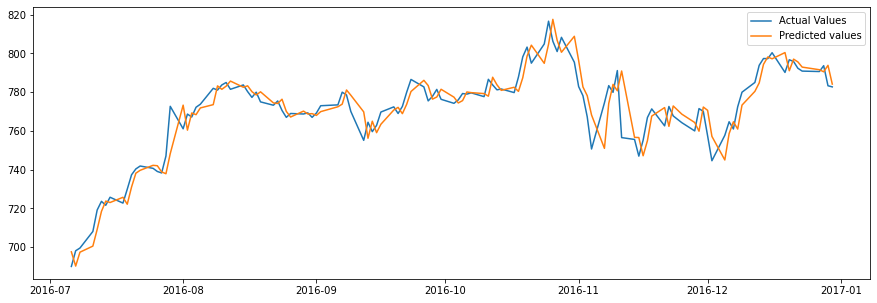

In [146]:
plt.figure(figsize=(15,5))
plt.plot(test,label="Actual Values")
plt.plot(pred_final,label = "Predicted values")
plt.legend()
plt.show()

#### Mean Square Error:

In [147]:
from sklearn.metrics import mean_squared_error as ms

In [148]:
mse=ms(test,pred_final)

In [149]:
mse

62.19341297050727

In [150]:
rmse=np.sqrt(mse)

In [151]:
rmse

7.886280046416515

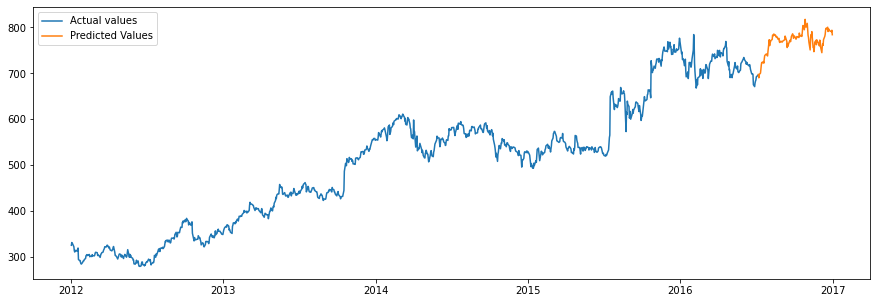

In [152]:
plt.figure(figsize=(15,5))
plt.plot(train,label = "Actual values")
plt.plot(pred_final,label = "Predicted Values")
plt.legend()
plt.show()

## Future Predictions::

In [153]:
data

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Open, Length: 1258, dtype: float64

In [154]:
model= ARIMA(data,order=(2,2,2))

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been pr

In [155]:
model=model.fit()

In [156]:
data

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Open, Length: 1258, dtype: float64

In [157]:
len(data)+19

1277

In [158]:
pred = model.predict(start=len(data),end =1277)

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [159]:
len(pred)

20

In [160]:
data

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Open, Length: 1258, dtype: float64

In [161]:
pred

1256    1.008564
1257    0.094247
1258   -0.107349
1259    0.096917
1260   -0.086462
1261    0.077679
1262   -0.069230
1263    0.062256
1264   -0.055427
1265    0.049902
1266   -0.044369
1267    0.040005
1268   -0.035512
1269    0.032077
1270   -0.028416
1271    0.025727
1272   -0.022732
1273    0.020640
1274   -0.018179
1275    0.016564
dtype: float64

In [103]:
data[-2:]

Date
2016-12-29    783.33
2016-12-30    782.75
Name: Open, dtype: float64

In [104]:
pred[:2]

1256    1.008564
1257    0.094247
dtype: float64

In [162]:
pred[:1]=data[-1:].values+pred[:1].values

In [163]:
pred.reset_index(drop=True,inplace=True)

In [164]:
for i in range(1,len(pred)):
    pred[i]=pred[i]+pred[i-1]

In [165]:
pred

0     783.758564
1     783.852812
2     783.745463
3     783.842380
4     783.755919
5     783.833597
6     783.764367
7     783.826624
8     783.771197
9     783.821099
10    783.776729
11    783.816735
12    783.781223
13    783.813300
14    783.784884
15    783.810611
16    783.787879
17    783.808519
18    783.790340
19    783.806904
dtype: float64